In [135]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 23.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [105]:
#importamos las librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error

 
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#cargamos el data set y hacemos una primera limpieza


In [61]:
paht= './data/diamonds_train.csv'   #leemos el archivos csv que esta en la carpeta data
diamons = pd.read_csv(paht, sep= ",")

In [62]:
diamons

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1
...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,Antwerp,62.7,57.0,7.10,7.04,4.43,Ideal,G,VS1
40451,12615,2.02,Madrid,57.1,60.0,8.31,8.25,4.73,Good,F,SI2
40452,5457,1.01,Kimberly,62.7,56.0,6.37,6.42,4.01,Ideal,H,SI1
40453,456,0.33,Kimberly,61.9,54.3,4.45,4.47,2.76,Ideal,J,VS1


In [63]:
diamons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   cut      40455 non-null  object 
 9   color    40455 non-null  object 
 10  clarity  40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [64]:
# Verificar si hay valores nulos en el conjunto de datos
nulos = diamons.isnull().sum()

# Mostrar los resultados
print(nulos)


price      0
carat      0
city       0
depth      0
table      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64


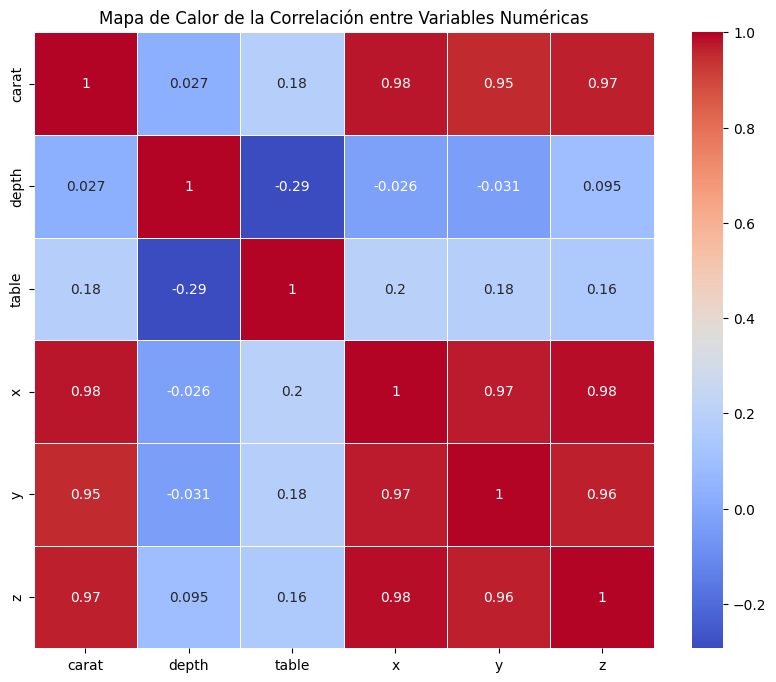

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas
numerical_columns = [ 'carat', 'depth', 'table', 'x', 'y', 'z']
numerical_data = diamons[numerical_columns]

# Calcular la correlación
correlation_matrix = numerical_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


In [66]:
# Obtener las categorías únicas en la columna 'city'
categorias_unicas = diamons['city'].unique()

# Mostrar las categorías únicas
print(categorias_unicas)


['Dubai' 'Kimberly' 'Las Vegas' 'Tel Aviv' 'Amsterdam' 'Zurich' 'Antwerp'
 'Madrid' 'Paris' 'Surat' 'Luxembourg' 'London' 'New York City']


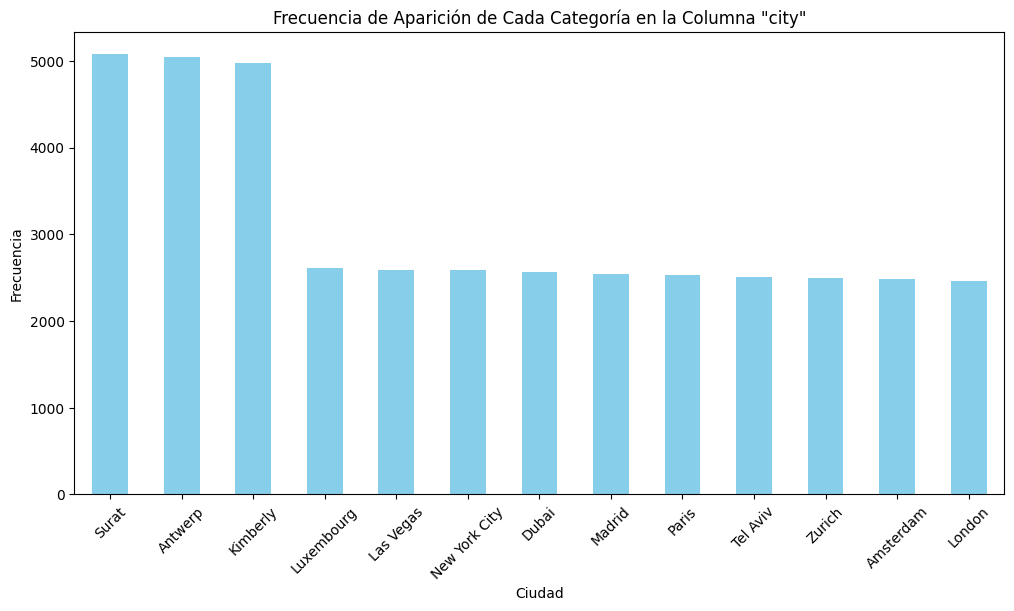

In [67]:

# Contar la frecuencia de aparición de cada categoría en la columna 'city'
frecuencia_categorias = diamons['city'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
frecuencia_categorias.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Aparición de Cada Categoría en la Columna "city"')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


# Cleaning -1
### Primera limpieza sin modificar nada

In [68]:
# Realizar one-hot encoding en la columna 'city' y convertir True/False a 1/0
diamons_encoded = pd.get_dummies(diamons, columns=['city'], dtype=int)

# Mostrar las primeras filas del conjunto de datos codificado
diamons_encoded.head()


,price,carat,depth,table,x,y,z,cut,color,clarity,...,city_Kimberly,city_Las Vegas,city_London,city_Luxembourg,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2,...,0,0,0,0,0,0,0,0,0,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2,...,1,0,0,0,0,0,0,0,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1,...,0,1,0,0,0,0,0,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,Good,D,SI1,...,1,0,0,0,0,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Realizar one-hot encoding en la columna 'cut' y convertir True/False a 1/0
diamons_encoded_2 = pd.get_dummies(diamons_encoded, columns=['cut'], dtype=int)

# Mostrar las primeras filas del conjunto de datos codificado
diamons_encoded_2.head()


,price,carat,depth,table,x,y,z,color,clarity,city_Amsterdam,...,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,J,VS2,0,...,0,0,0,0,0,0,0,0,1,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,H,VS2,0,...,0,0,0,0,0,0,0,0,0,1
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,G,VS1,0,...,0,0,0,0,0,1,0,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,D,SI1,0,...,0,0,0,0,0,0,1,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,G,SI1,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# Realizar one-hot encoding en la columna 'color' y convertir True/False a 1/0
diamons_encoded_3 = pd.get_dummies(diamons_encoded_2, columns=['color'], dtype=int)

# Mostrar las primeras filas del conjunto de datos codificado
diamons_encoded_3.head()


,price,carat,depth,table,x,y,z,clarity,city_Amsterdam,city_Antwerp,...,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,VS2,0,0,...,0,1,0,0,0,0,0,0,0,1
1,505,0.32,63.0,57.0,4.35,4.38,2.75,VS2,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,VS1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,SI1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,SI1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [71]:
# Realizar one-hot encoding en la columna 'clarity' y convertir True/False a 1/0
diamons_encoded_4 = pd.get_dummies(diamons_encoded_3, columns=['clarity'], dtype=int)

# Mostrar las primeras filas del conjunto de datos codificado
diamons_encoded_4.head()


,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [72]:
diamons_encoded_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               40455 non-null  int64  
 1   carat               40455 non-null  float64
 2   depth               40455 non-null  float64
 3   table               40455 non-null  float64
 4   x                   40455 non-null  float64
 5   y                   40455 non-null  float64
 6   z                   40455 non-null  float64
 7   city_Amsterdam      40455 non-null  int64  
 8   city_Antwerp        40455 non-null  int64  
 9   city_Dubai          40455 non-null  int64  
 10  city_Kimberly       40455 non-null  int64  
 11  city_Las Vegas      40455 non-null  int64  
 12  city_London         40455 non-null  int64  
 13  city_Luxembourg     40455 non-null  int64  
 14  city_Madrid         40455 non-null  int64  
 15  city_New York City  40455 non-null  int64  
 16  city

In [553]:
#Separar las características (X) y el objetivo (y):
X = diamons_encoded_4.drop('price', axis=1)
y = diamons_encoded_4['price']


In [554]:
#Dividir el conjunto de datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [555]:
#Entrenar el modelo de regresión lineal:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [557]:
y_pred = model.predict(X_test)


In [558]:
y_pred

array([3592.96608277, 3180.81613542, 1303.98482916, ..., 3346.97480563,
       4535.72452378, 9416.40539573])

In [559]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1265299.6336762474
R^2 Score: 0.9223017804520173


In [566]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

1124.8553834499114

In [567]:
model 

LinearRegression()

## Paso 1
Cargar el csv de test 
## paso 2
Aplicamos las mismas transformaciones que hicimos en el data frame tarin 
## Paso 3 
Generamos la prediciones con el .predict
## Paso 4 
Convertimos el numpy array en un dataframe 
## paso 5 
convertimos ese dataframe en csv 

# Cleaning - 1 - test 

In [389]:
paht= './data/diamonds_test.csv'
diamons_test = pd.read_csv(paht, sep= ",")

In [390]:
diamons_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [83]:
#paso 2

diamons_test_final = pd.get_dummies(diamons_test, columns=["city","cut","color","clarity",], dtype=int)

In [84]:
diamons_test_final.head()

,id,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
x_test = diamons_test_final.drop("id", axis=1)

In [86]:
#paso 3
y_pred_test = model.predict(x_test)

In [87]:
y_pred_test

array([ 3663.15318434,  6301.51625872, 10100.28314186, ...,
        3902.53069612,  1936.88218113,   713.46238336])

In [513]:
# Convertir el array de NumPy en un DataFrame de pandas
y_pred_test_df_2 = pd.DataFrame(y_pred_test, columns=['Price'])

# Mostrar las primeras filas del DataFrame
y_pred_test_df.head()


,Price,id
0,3663.153184,0
1,6301.516259,1
2,10100.283142,2
3,4662.073851,3
4,2146.382485,4


In [88]:
y_pred_test_df['id'] = y_pred_test_df.index


In [514]:
y_pred_test_df

,Price,id
0,3663.153184,0
1,6301.516259,1
2,10100.283142,2
3,4662.073851,3
4,2146.382485,4
...,...,...
13480,2001.048670,13480
13481,2503.543035,13481
13482,3902.530696,13482
13483,1936.882181,13483


In [102]:
#paso 5

# Guardar el DataFrame en un archivo CSV en la carpeta 'predictions'
y_pred_test_df.to_csv('predictions/cleaning-1-model-LinealRegression.csv', index=False)

print("El DataFrame ha sido guardado en la carpeta 'predictions'.")



El DataFrame ha sido guardado en la carpeta 'predictions'.


# Probando modelos cleaning-1-test

## ARBOL DE DECICONES 

In [91]:
#ARBOL DE DECICONES 
model_2 = DecisionTreeRegressor()


In [92]:
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print(f"Decision Tree RMSE: {rmse}")



Decision Tree RMSE: 743.6012940214663


In [93]:
#paso 3
y_pred_test_2 = model_2.predict(x_test)

In [113]:
# recordar X_test es de el data set de entrenamiento 
X_test

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
17775,0.70,63.8,58.0,5.58,5.61,3.57,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13506,0.61,61.3,54.0,5.53,5.50,3.38,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4325,0.33,61.6,55.0,4.46,4.47,2.75,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37870,1.00,58.6,61.0,6.53,6.50,3.82,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21321,0.29,62.7,61.0,4.20,4.22,2.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,1.03,63.1,57.0,6.45,6.41,4.06,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26959,0.32,62.7,54.0,4.39,4.35,2.74,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15529,0.71,61.3,57.0,5.74,5.78,3.53,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36333,0.90,59.6,63.0,6.24,6.17,3.70,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [114]:
#Recordar x_test es el data set de test de la pagina kaggel
x_test

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13482,0.70,61.6,55.0,5.75,5.71,3.53,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13483,0.70,58.8,57.0,5.85,5.89,3.45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
# Convertir el array de NumPy en un DataFrame de pandas
y_pred_test_2_df = pd.DataFrame(y_pred_test_2, columns=['Price'])

# Mostrar las primeras filas del DataFrame
y_pred_test_2_df.head()


,Price
0,3047.0
1,5324.0
2,7066.0
3,4545.0
4,1822.0


In [100]:
y_pred_test_2_df['id'] = y_pred_test_2_df.index

In [103]:
# Guardar el DataFrame en un archivo CSV en la carpeta 'predictions'
y_pred_test_2_df.to_csv('predictions/cleaning-1-model-Decision-Trees.csv', index=False)

print("El DataFrame ha sido guardado en la carpeta 'predictions'.")



El DataFrame ha sido guardado en la carpeta 'predictions'.


array([3592.96608277, 3180.81613542, 1303.98482916, ..., 3346.97480563,
       4535.72452378, 9416.40539573])

In [89]:
y_pred_2

array([3592.96608277, 3180.81613542, 1303.98482916, ..., 3346.97480563,
       4535.72452378, 9416.40539573])

## RAMDON FOREST REGRESSOR

In [109]:
#RAMDON FOREST REGRESSOR


model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
print(f"Random Forest RMSE: {rmse}")


Random Forest RMSE: 563.0085964761578


In [125]:
%%time
# Realizar validación cruzada y calcular el RMSE
scores = cross_val_score(model_3, 
                         X, 
                         y, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5,
                         n_jobs=-1)

# Imprimir el tipo de modelo y los scores
print(type(model_3), '\n')
print(scores, '\n')

# Calcular y mostrar el RMSE promedio
print(np.mean(-scores))


<class 'sklearn.ensemble._forest.RandomForestRegressor'> 

[-570.56142115 -519.68595873 -549.97920567 -556.56774906 -539.45522448
 -567.00715787 -577.79344236 -610.4657208  -526.18912798 -547.20339713] 

556.4908405236089
CPU times: total: 5.75 s
Wall time: 5min 6s


In [537]:
y_pred_test_3 = model_3.predict(x_test)

In [538]:
y_pred_test_3

array([2968.75, 5381.89, 9520.64, ..., 2941.17, 2186.22,  833.36])

In [544]:
# Convertir el array de NumPy en un DataFrame de pandas
y_pred_test_3_df = pd.DataFrame(y_pred_test_3, columns=['Price'])
y_pred_test_3_df['id'] = y_pred_test_3_df.index
# Mostrar las primeras filas del DataFrame
y_pred_test_df


,Price,id
0,3663.153184,0
1,6301.516259,1
2,10100.283142,2
3,4662.073851,3
4,2146.382485,4
...,...,...
13480,2001.048670,13480
13481,2503.543035,13481
13482,3902.530696,13482
13483,1936.882181,13483


In [124]:
# Guardar el DataFrame en un archivo CSV en la carpeta 'predictions'
y_pred_test_3_df.to_csv('predictions/cleaning-1-model-Forest-Regression.csv', index=False)

print("El DataFrame ha sido guardado en la carpeta 'predictions'.")



El DataFrame ha sido guardado en la carpeta 'predictions'.


In [97]:
#REDESNEURONALES
from sklearn.neural_network import MLPRegressor



model_4 = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
model_4.fit(X_train, y_train)
y_pred_4 = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_4))
print(f"Neural Network RMSE: {rmse}")


Neural Network RMSE: 754.003746130017


## Extra Trees Regressor

In [128]:
%%time
#Extra Trees Regressor:


model_4 = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_4))
print(f"Extra Trees RMSE: {rmse}")


Extra Trees RMSE: 550.2507904882584
CPU times: total: 36.8 s
Wall time: 43.4 s


In [129]:
%%time
# Realizar validación cruzada y calcular el RMSE
scores = cross_val_score(model_4, 
                         X, 
                         y, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5,
                         n_jobs=-1)

# Imprimir el tipo de modelo y los scores
print(type(model_4), '\n')
print(scores, '\n')

# Calcular y mostrar el RMSE promedio
print(np.mean(-scores))


<class 'sklearn.ensemble._forest.ExtraTreesRegressor'> 

[-553.97846387 -566.72046164 -557.58511892 -588.87190375 -559.71068998] 

565.3733276341707
CPU times: total: 2.25 s
Wall time: 2min 51s


In [525]:
y_pred_test_4 = model_4.predict(x_test)

In [526]:
y_pred_test_4

array([3016.6 , 5317.25, 9569.92, ..., 2831.16, 2126.66,  834.31])

In [132]:
# Convertir el array de NumPy en un DataFrame de pandas
y_pred_test_4_df = pd.DataFrame(y_pred_test_4, columns=['Price'])

# Mostrar las primeras filas del DataFrame
y_pred_test_4_df.head()
y_pred_test_4_df['id'] = y_pred_test_4_df.index

In [133]:
# Guardar el DataFrame en un archivo CSV en la carpeta 'predictions'
y_pred_test_4_df.to_csv('predictions/cleaning-1-Extra-Trees-Regressor.csv', index=False)

print("El DataFrame ha sido guardado en la carpeta 'predictions'.")



El DataFrame ha sido guardado en la carpeta 'predictions'.


## LightGBM

In [527]:
#LightGBM:


model_5 = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_5))
print(f"LightGBM RMSE: {rmse}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 32364, number of used features: 39
[LightGBM] [Info] Start training from score 3927.895532
LightGBM RMSE: 548.0259072062198


In [528]:
%%time
# Realizar validación cruzada y calcular el RMSE
scores = cross_val_score(model_5, 
                         X, 
                         y, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5,
                         n_jobs=-1)

# Imprimir el tipo de modelo y los scores
print(type(model_5), '\n')
print(scores, '\n')

# Calcular y mostrar el RMSE promedio
print(np.mean(-scores))

<class 'lightgbm.sklearn.LGBMRegressor'> 

[-543.14196657 -532.53044016 -551.74587573 -594.52486968 -530.63955441] 

550.5165413101453
CPU times: total: 250 ms
Wall time: 20.3 s


In [536]:
y_pred_test_5

array([2872.00612916, 5522.48446491, 9533.7825239 , ..., 3096.28243268,
       2146.24734663,  802.56518621])

In [140]:
#Pasar lod datos de test 
y_pred_test_5 = model_5.predict(x_test)

# Convertir el array de NumPy en un DataFrame de pandas
y_pred_test_5_df = pd.DataFrame(y_pred_test_5, columns=['Price'])

# Mostrar las primeras filas del DataFrame
y_pred_test_5_df['id'] = y_pred_test_5_df.index
y_pred_test_5_df.head()


,Price,id
0,2872.006129,0
1,5522.484465,1
2,9533.782524,2
3,4043.622544,3
4,1621.033010,4


In [143]:
# Guardar el DataFrame en un archivo CSV en la carpeta 'predictions'
y_pred_test_5_df.to_csv('predictions/cleaning-1-LightGBM.csv', index=False)

print("El DataFrame ha sido guardado en la carpeta 'predictions'.")



El DataFrame ha sido guardado en la carpeta 'predictions'.
